# Draft

Change to using graphing.py rather than matplotlib
Remove this cell once done

# Exercise: Train a multiple linear regression model
In this exercise, we will train both a simple linear regression model and a multiple linear regresion model, and compare their performance using R<sup>2</sup>.

## Loading data
Let's start by having a look at our data.

In [2]:
import pandas
# import matplotlib.pyplot as graph
# from matplotlib import cm
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
# from numpy import reshape, array, meshgrid
# import joblib

#Import the data from the .csv file
dataset = pandas.read_csv('Data/pox_outbreak_patients.csv', delimiter="\t")

#Let's have a look at the data
dataset

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care
0,0,1,6.9,38,38.423169,0,0
1,0,1,5.4,32,39.015998,0,0
2,1,1,5.4,12,39.148341,0,0
3,1,0,4.8,23,39.060049,0,0
4,1,0,4.8,15,38.655439,0,0
...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0
94,1,0,1.8,11,38.790426,1,1
95,0,0,6.6,20,39.489962,0,0
96,0,0,6.9,32,38.575742,1,1


For this exercise we will try to predict `core_temperature` from some of the other available features. 

## Data visualization
Let's quickly eyeball which features seem to have some kind of relationship with `core_temperature`

In [11]:
import graphing # Custom graphing code that uses Plotly. See our GitHub repository for details

graphing.box_and_whisker(dataset, "male", "core_temperature", show=True)
graphing.box_and_whisker(dataset, "attended_training", "core_temperature", show=True)
graphing.box_and_whisker(dataset, "ate_at_tonys_steakhouse", "core_temperature", show=True)
graphing.scatter_2D(dataset, "body_fat_percentage", "core_temperature", show=True)
graphing.scatter_2D(dataset, "age", "core_temperature")

At a glance, fatter, older, and male dogs seem to more commonly have higher temperatures than thinner, younger, or female dogs. The other features don't seem particularly useful.

## Simple linear regression

Let's try to predict `core_temperature` using simple linear regression, and note the R<sup>2</sup> for these relationships. 

In [42]:
import statsmodels.formula.api as smf
import graphing # custom graphing code. See our GitHub repo for details

for feature in ["age", "body_fat_percentage", "male"]:
    # Perform linear regression. This method takes care of
    # the entire fitting procedure for us.
    formula = "core_temperature ~ " + feature
    model = smf.ols(formula = formula, data = dataset).fit()

    print(feature)
    print("R-squared:", model.rsquared)
    
    # Show a graph of the result
    graphing.scatter_2D(dataset, label_x=feature, 
                                 label_y="core_temperature",
                                 title = feature,
                                 trendline=lambda x: model.params[1] * x + model.params[0],
                                 show=True)

age
R-squared: 0.2648116081342464
                            OLS Regression Results                            
Dep. Variable:       core_temperature   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     34.58
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           5.94e-08
Time:                        17:02:32   Log-Likelihood:                -88.749
No. Observations:                  98   AIC:                             181.5
Df Residuals:                      96   BIC:                             186.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0

body_fat_percentage
R-squared: 0.00020809002637933727
                            OLS Regression Results                            
Dep. Variable:       core_temperature   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.01998
Date:                Thu, 03 Jun 2021   Prob (F-statistic):              0.888
Time:                        17:02:32   Log-Likelihood:                -103.81
No. Observations:                  98   AIC:                             211.6
Df Residuals:                      96   BIC:                             216.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

male
R-squared: 0.0999007443071992
                            OLS Regression Results                            
Dep. Variable:       core_temperature   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     10.65
Date:                Thu, 03 Jun 2021   Prob (F-statistic):            0.00152
Time:                        17:02:33   Log-Likelihood:                -98.665
No. Observations:                  98   AIC:                             201.3
Df Residuals:                      96   BIC:                             206.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.

Scrolling through these graphs, we get R-square values of 0.0002 (`body_fat_percentage`), 0.1 (`male`), and 0.26 (`age`).

## Multiple Linear Regression

Instead of modelling these separately, lets try to combine these into a single model. Body fat didn't seem to be useful afterall, so let's just us `male` and `age` as features. 

In [27]:
model = smf.ols(formula = "core_temperature ~ age + male", data = dataset).fit()

print("R-squared:", model.rsquared)

R-squared: 0.3148512699768009


By using both features at the same time, we got a better result than any of the one-feature (univariate) models.

How can we view this though? Well, a simple linear regression is drawn in 2d. If we are working with an extra variable, we add one dimension and work in 3D. 


In [41]:
import numpy as np
# Show a graph of the result
# this needs to be 3D, because we now have three variables in play: two features and one label
fig0 = graphing.scatter_3D(dataset, label_x="age", 
                                label_y="male",
                                label_z="core_temperature")

def predict(age, male):
    # to make a prediction with statsmodels, we need to provide a dataframe
    # so create a dataframe with just the age and male variables
    df = pandas.DataFrame(dict(age=[age], male=[male]))
    return model.predict(df)

fig=graphing.surface(
    x_values=np.array([min(dataset.age), max(dataset.age)]),
    y_values=np.array([0, 1]),
    calc_z=predict,
    axis_title_x="Age",
    axis_title_y="Male",
    axis_title_z="Core temperature"
)

fig.add_scatter3d(x=dataset.age, y=dataset.male, z=dataset.core_temperature)

fig.show()

     cylinders  origin  car name
0            4       3         0
1            4       2         1
2            4       2         2
3            4       2         3
4            4       2         4
..         ...     ...       ...
387          4       1       296
388          4       1       297
389          6       1       298
390          4       1       299
391          6       1       300

[392 rows x 3 columns]


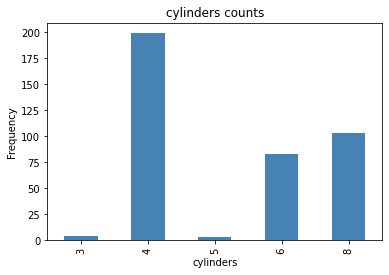

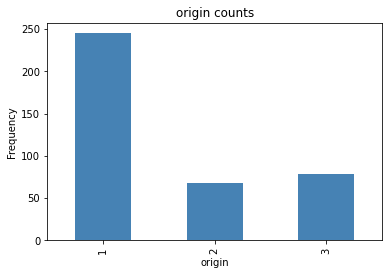

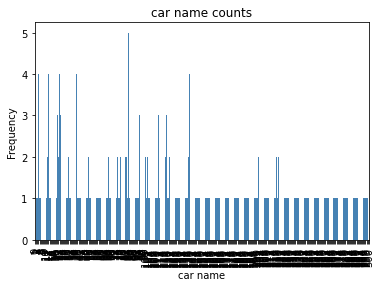

In [5]:
# Let's use pandas' concatenate function to create our categorical features subset
categorical_features = pd.concat([dataset.iloc[:,1],dataset.iloc[:,7:]],axis=1)


# Let's transform the vehicle names into unique integer identifiers for ease of use
unique_car_name = categorical_features['car name'].unique()
car_ids = dict(zip(unique_car_name, range(len(unique_car_name))))
categorical_features['car name'] = categorical_features['car name'].map(car_ids)

print(categorical_features)

for feature in categorical_features:
    
    %matplotlib inline
    xval = categorical_features[feature]    
    counts = xval.value_counts().sort_index()
    fig = graph.figure()
    ax = graph.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(feature + ' counts')
    ax.set_xlabel(feature) 
    ax.set_ylabel("Frequency")

    graph.show()

This tells us that most cars come from a single country, and that the vast majority of cars have got 4-cylinder engines

## Simple linear regression
We've had a look at the data, so now let's create a model that can predict cars' mpg performance. Let's first explore the effect of a single feature, the car's weight, on its mpg performance

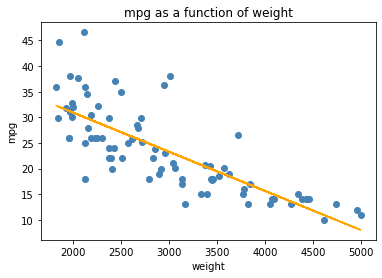

RMSE: 5.160060684030852


['./cars_mpg_weight_model.pkl']

In [6]:
X = array(dataset['weight'])
y = array(dataset['mpg'])

#random_state for reproducibilty
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#reshape arrays for 'LinearRegression'

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

model = LinearRegression().fit(X_train,y_train)

y_pred = model.predict(X_test)

# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
intercept = model.intercept_
slope = model.coef_
line = slope * X_test + intercept
graph.scatter(X_test, y_test,  color='steelblue')
graph.plot(X_test, line, '-', c = 'orange')
graph.ylabel('mpg')
graph.xlabel('weight')
graph.title('mpg as a function of weight')
graph.show()

rms = mean_squared_error(y_test,y_pred, squared=False)
print(f"RMSE: {rms}")

#Let's save this model in case we want to use it later
#Save the model as a pickle file
filename = './cars_mpg_weight_model.pkl'
joblib.dump(model, filename)

## Multiple linear regression
There seems to be a relationship between a car's weight and its mpg performance. Let's see what happens if we include an extra feature into the mix, like its engine displacement

RMSE: 5.138210456138803


['./cars_mpg_weight_displacement_model.pkl']

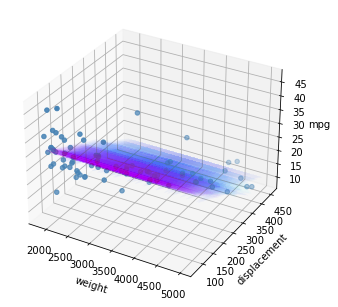

In [7]:
X = array(dataset[['weight','displacement']])
y = array(dataset['mpg'])


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# reshape arrays for 'LinearRegression'
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

model = LinearRegression().fit(X_train,y_train)

y_pred = model.predict(X_test)

# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
fig = graph.figure()
ax = Axes3D(fig)

x_plot = X_test[:,0].flatten()
y_plot = X_test[:,1].flatten()
z_plot = y_test.flatten()

x_grid,y_grid = meshgrid(x_plot,y_plot)
z_grid = y_pred

ax.set_xlabel('weight')
ax.set_ylabel('displacement')
ax.set_zlabel('mpg')

ax.scatter(x_plot,y_plot,z_plot, color='steelblue')
ax.plot_surface(x_grid,y_grid,z_grid, cmap=cm.cool, alpha=0.01)


#TO DO: ADD TITLE TO 3D PLOT

rms = mean_squared_error(y_test,y_pred, squared=False)
print(f"RMSE: {rms}")

#Let's save this model in case we want to use it later
# Save the model as a pickle file
filename = './cars_mpg_weight_displacement_model.pkl'
joblib.dump(model, filename)

The RMSE of this multiple linear regression model is lower than that of the simple linear regression mod. Using multiple features allows to make more accurate predictions when testing a model on unseen data.

## Summary
We covered the following concepts in this exercise:

- Quickly visualize a dataset's labels, numerical, and categorical features.
- Build Single and Multiple Linear Regression Models.
- Compare the performance of both models visually, and as a function of RMSE.